In [1]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import json
from fim import apriori, fpgrowth, eclat
import matplotlib.pyplot as plt
import time

In [2]:
# Source
# http://sideeffects.embl.de/download/
# SIDER

# Data preparation

In [3]:
id_name = pd.read_csv('./side_effects/drug_names.tsv', sep='\t', header=None, names=['id', 'name'])
id_name

,id,name
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate
...,...,...
1425,CID156603655,pegaptanib
1426,CID156842239,n-3
1427,CID170683024,x
1428,CID170695640,colestyramine


In [4]:
dataset = pd.read_csv('./side_effects/meddra_all_se.tsv', sep='\t', header=None, 
            names=['id_1', 'id_2', 'UMLS_id', 'MedDRA_type', 'UMLS_id_for_MedDRA', 'side_effect'])

dataset=dataset[['id_1', 'id_2', 'side_effect']]
#dataset = dataset['id_1'].map(id_name.set_index('id')['name'])
#dataset = dataset['id_2'].map(id_name.set_index('id')['name'])
dataset

,id_1,id_2,side_effect
0,CID100000085,CID000010917,Abdominal cramps
1,CID100000085,CID000010917,Abdominal pain
2,CID100000085,CID000010917,Abdominal pain
3,CID100000085,CID000010917,Gastrointestinal pain
4,CID100000085,CID000010917,Abdominal pain
...,...,...,...
309844,CID171306834,CID071306834,Respiratory failure
309845,CID171306834,CID071306834,Abnormal vision
309846,CID171306834,CID071306834,Visual impairment
309847,CID171306834,CID071306834,Warts


In [5]:
dataset = dataset.groupby(['id_1','id_2'])['side_effect'].apply(list)
dataset

id_1          id_2        
CID100000085  CID000010917    [Abdominal cramps, Abdominal pain, Abdominal p...
CID100000119  CID000000119    [Anaphylactic shock, Anaphylactic shock, Angio...
CID100000137  CID000000137    [Anaemia, Anaemia, Aphasia, Aphasia, Mental di...
CID100000143  CID000000143    [Alopecia, Alopecia, Anorexia, Decreased appet...
              CID000006006    [Alopecia, Alopecia, Anorexia, Decreased appet...
                                                    ...                        
CID156603655  CID056603655    [Anaphylactic shock, Anaphylactic shock, Angio...
CID156842239  CID056842239    [Anaphylactic shock, Anaphylactic shock, Const...
CID170683024  CID070683024    [Angioedema, Angioedema, Chest pain, Chest pai...
CID170695640  CID070695640    [Abdominal pain, Gastrointestinal pain, Abdomi...
CID171306834  CID071306834    [Abdominal distension, Abdominal distension, A...
Name: side_effect, Length: 1556, dtype: object

In [6]:
transactions=[]

for item in dataset.values:
    transactions.append(list(set(item)))

In [7]:
transactions[0:4]

[['Body odor',
  'Dyspnoea',
  'Hypertonia',
  'Body temperature increased',
  'Angiopathy',
  'Gastrointestinal disorder',
  'Gastric atony',
  'Hypotension',
  'Gastritis',
  'Myalgia',
  'Insomnia',
  'Convulsion',
  'Decreased appetite',
  'Renal failure',
  'Pain',
  'Accidental injury',
  'Melaena',
  'Hypertension',
  'Infection',
  'Impaired gastric emptying',
  'Myasthenia',
  'Abdominal cramps',
  'Hyperkalaemia',
  'Weight increased',
  'Anorexia',
  'Pruritus',
  'Anaemia',
  'Hypersensitivity',
  'Parathyroid disorder',
  'Bronchitis',
  'Dysgeusia',
  'Depression',
  'Arrhythmia',
  'Oedema peripheral',
  'Chest pain',
  'Abdominal pain',
  'Rash',
  'Eye disorder',
  'Sinusitis',
  'Influenza',
  'Drug dependence',
  'Cough',
  'Dermatitis',
  'Haemoglobin',
  'Injury',
  'Asthenia',
  'Tachycardia',
  'Back pain',
  'Haemorrhage',
  'Weight decreased',
  'Cramps of lower extremities',
  'Amblyopia',
  'Injection site reaction',
  'Muscular weakness',
  'Cardiovascular d

In [8]:
len(transactions)

1556

## Done

In [9]:
pd.set_option("max_colwidth", 150)

In [10]:
support=50
confidence=10 
target='rules'
zmin=2 # антицидент+консеквент
zmax=7 # антицидент+консеквент

# Apriori

In [11]:
start=time.perf_counter()
fi_apriori = apriori(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.2797146579996479


In [12]:
df_apriori = pd.DataFrame.from_records(fi_apriori).sort_values(by=[2],ascending=False).reset_index(drop=True)
df_apriori

,0,1,2
0,Rash,"(Dermatitis,)",1158
1,Dermatitis,"(Rash,)",1158
2,Nausea,"(Vomiting,)",1150
3,Vomiting,"(Nausea,)",1150
4,Headache,"(Nausea,)",1103
...,...,...,...
72182,Loose stools,"(Abdominal pain, Rash, Dermatitis)",78
72183,Depersonalisation,"(Diarrhoea, Vomiting, Rash, Dermatitis, Headache)",78
72184,Toothache,"(Asthenia, Dizziness, Vomiting, Nausea)",78
72185,Hypokinesia,"(Asthenia, Vomiting, Dermatitis)",78


# FP-Growth

In [13]:
start=time.perf_counter()
fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.10251820299890824


In [14]:
df_fpgrowth = pd.DataFrame.from_records(fi_fpgrowth).sort_values(by=[2],ascending=False).reset_index(drop=True)
df_fpgrowth

,0,1,2
0,Dermatitis,"(Rash,)",1158
1,Rash,"(Dermatitis,)",1158
2,Nausea,"(Vomiting,)",1150
3,Vomiting,"(Nausea,)",1150
4,Nausea,"(Headache,)",1103
...,...,...,...
72182,Cerebration impaired,"(Asthenia, Dizziness, Vomiting, Nausea)",78
72183,Intestinal obstruction,"(Hypersensitivity, Dizziness)",78
72184,Vaginal discharge,"(Asthenia, Vomiting, Dermatitis)",78
72185,Cerebration impaired,"(Asthenia, Vomiting, Dermatitis)",78


# ECLAT

In [15]:
start=time.perf_counter()
fi_eclat = eclat(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

0.12202067699945474


In [16]:
df_fi_eclat = pd.DataFrame.from_records(fi_eclat).sort_values(by=[2],ascending=False).reset_index(drop=True)
df_fi_eclat

,0,1,2
0,Dermatitis,"(Rash,)",1158
1,Rash,"(Dermatitis,)",1158
2,Nausea,"(Vomiting,)",1150
3,Vomiting,"(Nausea,)",1150
4,Headache,"(Nausea,)",1103
...,...,...,...
72182,Vaginal discharge,"(Asthenia, Vomiting, Dermatitis)",78
72183,Transaminases increased,"(Pruritus, Rash, Dermatitis, Headache)",78
72184,Thrombocytosis,"(Asthenia, Vomiting, Dermatitis)",78
72185,Ileus,"(Hypersensitivity, Dizziness)",78


## Association rules

In [17]:
df_fi_eclat.values.tolist()

[['Dermatitis', ('Rash',), 1158],
 ['Rash', ('Dermatitis',), 1158],
 ['Nausea', ('Vomiting',), 1150],
 ['Vomiting', ('Nausea',), 1150],
 ['Headache', ('Nausea',), 1103],
 ['Nausea', ('Headache',), 1103],
 ['Nausea', ('Rash',), 1069],
 ['Rash', ('Nausea',), 1069],
 ['Nausea', ('Dermatitis',), 1069],
 ['Dermatitis', ('Nausea',), 1069],
 ['Dermatitis', ('Rash', 'Nausea'), 1054],
 ['Rash', ('Dermatitis', 'Nausea'), 1054],
 ['Nausea', ('Rash', 'Dermatitis'), 1054],
 ['Nausea', ('Dizziness',), 1049],
 ['Dizziness', ('Nausea',), 1049],
 ['Dizziness', ('Headache',), 1030],
 ['Headache', ('Dizziness',), 1030],
 ['Nausea', ('Diarrhoea',), 1021],
 ['Diarrhoea', ('Nausea',), 1021],
 ['Vomiting', ('Headache',), 996],
 ['Headache', ('Vomiting',), 996],
 ['Dermatitis', ('Headache',), 994],
 ['Headache', ('Dermatitis',), 994],
 ['Rash', ('Headache',), 989],
 ['Headache', ('Rash',), 989],
 ['Vomiting', ('Dermatitis',), 986],
 ['Dermatitis', ('Vomiting',), 986],
 ['Vomiting', ('Headache', 'Nausea'), 985

In [18]:
df_fi_eclat.values.tolist()[0]

['Dermatitis', ('Rash',), 1158]

In [19]:
df_fi_eclat.values.tolist()[-1]

['Lung disorder', ('Asthenia', 'Vomiting', 'Dermatitis'), 78]

# Фиксированный набор данных, изменяемый порог поддержки

In [20]:
confs = [10,20,30,40,50,60,70,80,90,99]

a = []
fp = []
e = []

fi_fpgrowth=[]

fr_it_set_size = []          # 2
fi_it_set_max_len = []       # 3
num_of_unique_fr_it_set = [] # 4

In [21]:
for conf in confs:
    start_a = time.perf_counter()
    fi_apriori = apriori(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin)
    end_a = time.perf_counter()
    
    start_fp = time.perf_counter()
    fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin)
    end_fp = time.perf_counter()
    
    #### 2.
    
    fr_it_set_size.append(len(fi_fpgrowth))
    
    #### 3
    
    size=[0,]
    for i in range(len(fi_fpgrowth)):
        size.append( len(fi_fpgrowth[i][0])+len(fi_fpgrowth[i][0]) )
    fi_it_set_max_len.append(max(size))
    
    #### 4
    
    fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin, zmax=7) 
    num_of_unique_fr_it_set.append(len(fi_fpgrowth))
    
    ####
    
    start_e = time.perf_counter()
    fi_e = eclat(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin)
    end_e = time.perf_counter()
    
    a.append(end_a-start_a)
    fp.append(end_fp-start_fp)
    e.append(end_e-start_e)

### 1. Сравнение быстродействия алгоритмов 

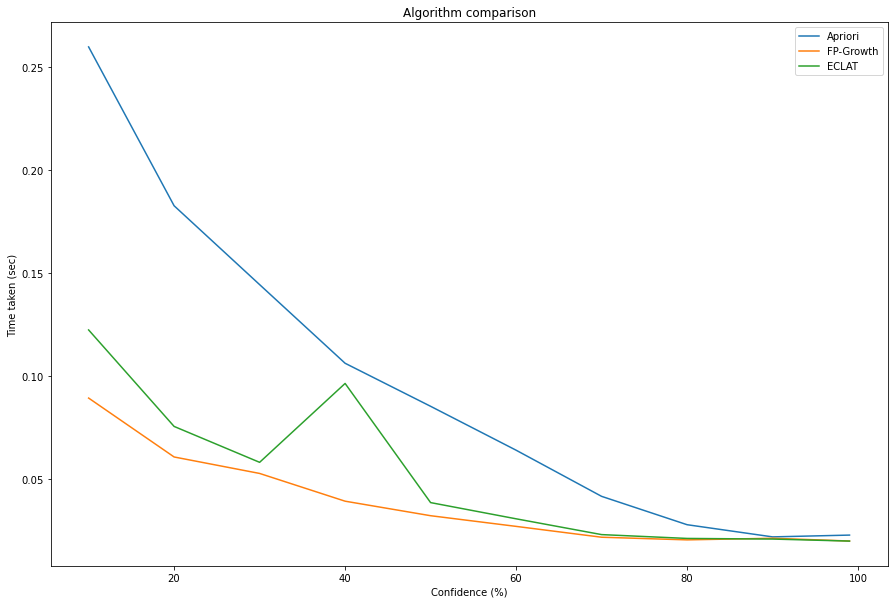

In [22]:
plt.plot(confs, a, label = "Apriori")
plt.plot(confs, fp, label = "FP-Growth")
plt.plot(confs, e, label = "ECLAT")

plt.xlabel('Confidence (%)')
plt.ylabel('Time taken (sec)')
plt.title('Algorithm comparison')
plt.legend(loc='best')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

In [23]:
print("Apriori:    FP-Growth:   ECLAT:")
for i in range(len(a)):
    print( "{:7.2f} {:13.2f} {:8.2f}".format(a[i],fp[i],e[i]) )

Apriori:    FP-Growth:   ECLAT:
   0.26          0.09     0.12
   0.18          0.06     0.08
   0.14          0.05     0.06
   0.11          0.04     0.10
   0.09          0.03     0.04
   0.06          0.03     0.03
   0.04          0.02     0.02
   0.03          0.02     0.02
   0.02          0.02     0.02
   0.02          0.02     0.02


### 2. Общее количество найденных правил

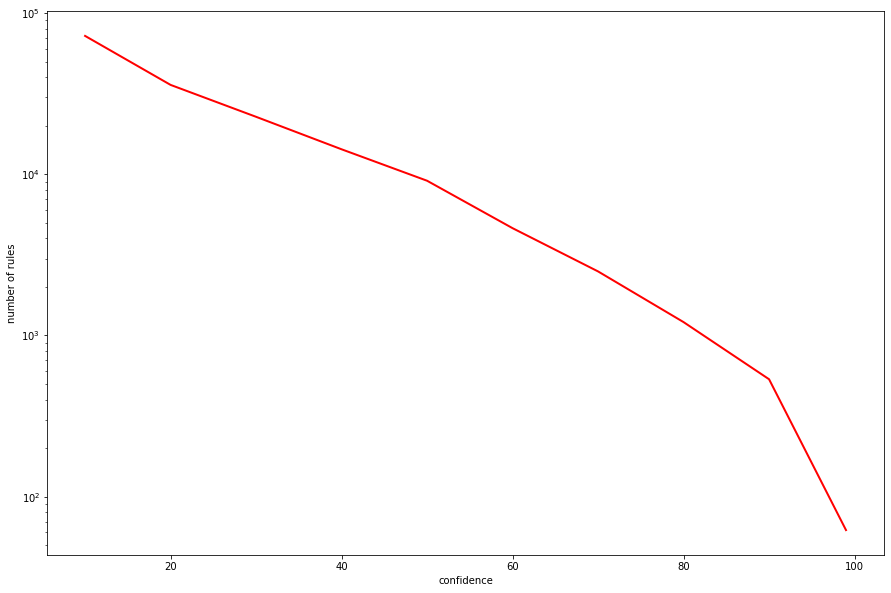

In [24]:
plt.plot(confs, fr_it_set_size, color='red', lw=2)

plt.xlabel('confidence')
plt.ylabel('number of rules')
plt.yscale('log')

fig = plt.gcf()
fig.set_size_inches(15,10)

plt.show()

In [25]:
print(confs)
print(fr_it_set_size)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 99]
[72187, 35850, 22726, 14289, 9118, 4630, 2496, 1210, 535, 62]


### 3. Максимальное количество объектов в правиле

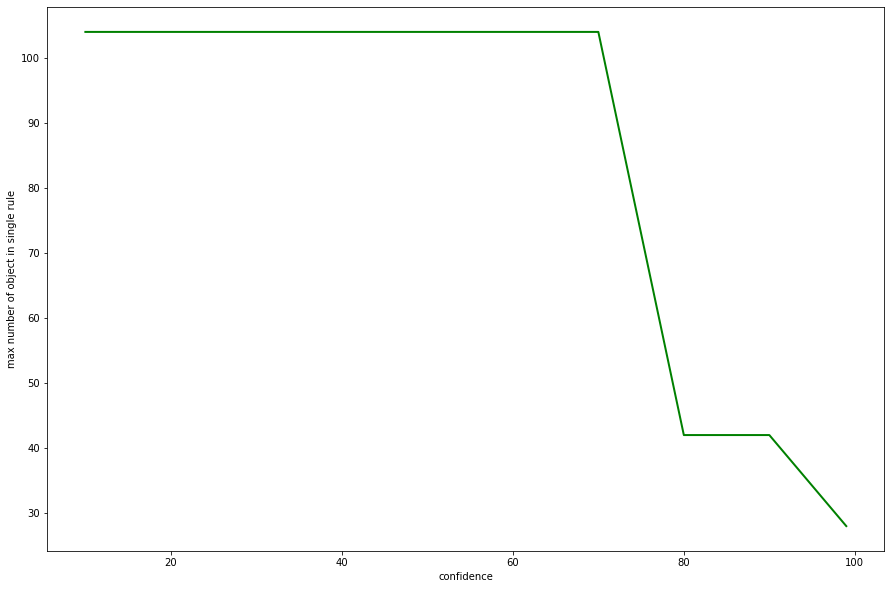

In [26]:
plt.plot(confs, fi_it_set_max_len, color='green', lw=2)

plt.xlabel('confidence')
plt.ylabel('max number of object in single rule')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

### 4. Количество правил, в которых антецедент и консеквент суммарно включают в себя не более семи объектов

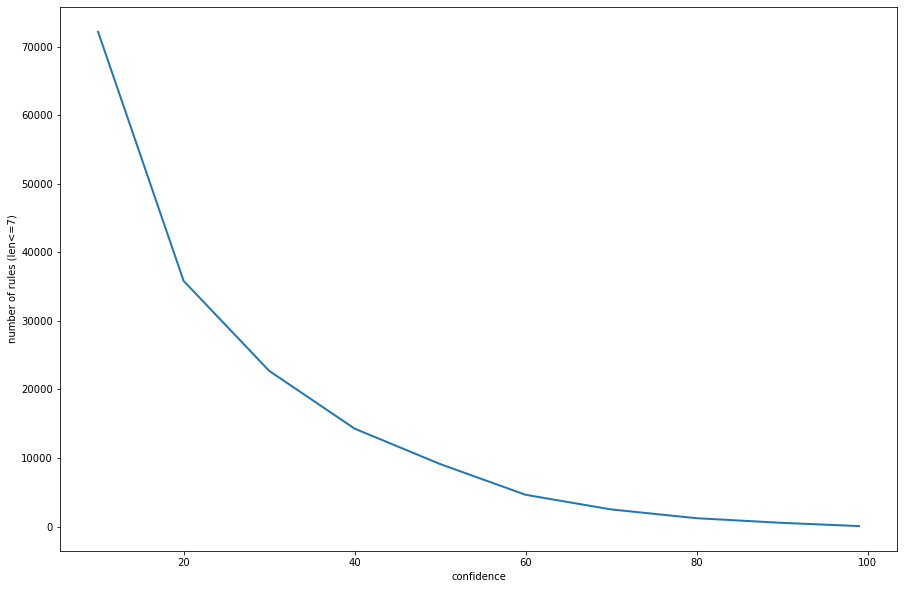

In [27]:
plt.plot(confs, num_of_unique_fr_it_set, lw=2)

plt.xlabel('confidence')
plt.ylabel('number of rules (len<=7)')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

### Some other data (useless for current task?)

In [28]:
# not so useful, but you can exclude placebo
#pd.read_csv('./side_effects/meddra_freq.tsv', sep='\t', header=None, 
#            names=['id_1', 'id_2', 'UMLS_id', 'placebo', 'frequency', 
#                   'lower_bound', 'upper_bound', 'MedDRA_type', 'UMLS_id_for_MedDRA', 'side_effect'])

In [29]:
#pd.read_csv('./side_effects/meddra.tsv', sep='\t', header=None, 
#            names=['UMLS_id', 'MedDRA_id', 'kind of term', 'side_effect'])

In [30]:
#pd.read_csv('./side_effects/meddra_all_indications.tsv', sep='\t', header=None, 
#            names=['id_1', 'UMLS_id', 'detection_method', 'concept_name', 
#                   'MedDRA_type', 'UMLS_id_for_MedDRA', 'MedDRA_concept_name'])

In [31]:
# meddra_all_label_indications.tsv.gz and meddra_all_label_se.tsv.gz
# These files contain the same data as the indications/se files, but with 
# an additional first column showing the source label.

#pd.read_csv('./side_effects/meddra_all_label_indications.tsv', sep='\t', header=None)
#pd.read_csv('./side_effects/meddra_all_label_se.tsv', sep='\t', header=None)